# Prueba Intertrimestral

Nombre y Apellidos: Pablo Dominguez Garcia de Viedma

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [140]:
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
import sklearn.datasets
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [4]:
def func(r,xn):
    return r*xn*(1-xn)

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [9]:
def recFunc(n,r,xn):
    lista=[]
    lista.append(xn)
    for i in range(0,n-1):
        lista.append(func(r,xn))
        xn=func(r,xn)
    return lista

[2, -0.2, -0.024000000000000004]


c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [27]:
df=pd.DataFrame(columns=['r','n','Xn+1'])
r=np.linspace(0.25,4,16)
for i in range(0,15):
    df.loc[i]=[r[i],i,recFunc(i,r[i],0.2)]
df.head(10)

,r,n,Xn+1
0,0.25,0,[0.2]
1,0.50,1,[0.2]
2,0.75,2,"[0.2, 0.12000000000000002]"
3,1.00,3,"[0.2, 0.16000000000000003, 0.13440000000000002]"
4,1.25,4,"[0.2, 0.2, 0.2, 0.2]"
5,1.50,5,"[0.2, 0.24000000000000005, 0.27360000000000007..."
6,1.75,6,"[0.2, 0.28, 0.3528, 0.39958128, 0.419853141178..."
7,2.00,7,"[0.2, 0.32000000000000006, 0.43520000000000003..."
8,2.25,8,"[0.2, 0.36000000000000004, 0.5184, 0.561738239..."
9,2.50,9,"[0.2, 0.4, 0.6, 0.6000000000000001, 0.6, 0.600..."


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [179]:
class data():

  def __init__(self,r,xo):
    df=pd.DataFrame(columns=['r','n','Xn+1'])
    self.df = df
    self.r=r
    self.xo=xo

  def obtener(self, n):
    return func(n,self.r,self.xo)
  
  def lista(self, n):
    return recFunc(n,self.r,self.xo)
  

  def plot(self, n):
    return plt.plot()

  def run(self, start, end):
    for i in range(start, end):
      self.df.loc[i] = [i, self.even(i), self.fact(i)]
    return self.df


# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [34]:
dataset=pd.read_csv('Walmart.csv')
print(dataset.describe())
print(dataset.info())
print(dataset.isna().sum())
df=dataset.dropna()
df.isna().sum()
#Para saber la información que nos dan y de que tipo hacemos un describe para ver los intervalos de las variables numericas 
# y un info() para ver de que tipo son, además el info() nos dice también que hay un valor non-null en unemployment
#Si que hay valores faltantes (NAs), por lo tanto los "droppeamos" para evitar que estos causen errores

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6434.000000  
mean    171.578394      7.999047  
std      39.356712      1.876012  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



Min Value:  33
Max Value:  20


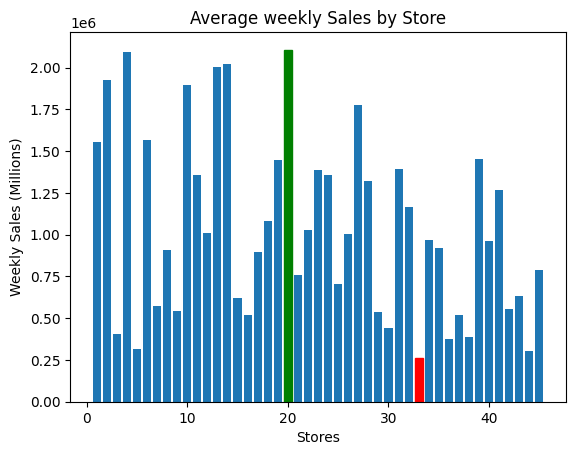

In [60]:
df.shape
tiendas={}
for i in range(0,6433):
    if df.loc[i]['Store'] in tiendas.keys():
        tiendas[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
    else:
        tiendas[df.loc[i]['Store']]=[]
        tiendas[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
promedio={}
for i in tiendas.keys():
    promedio[i]= st.mean(tiendas.get(i))
bars=plt.bar(promedio.keys(),promedio.values()) 
plt.title('Average weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales (Millions)')
print("Min Value: ", list(promedio.keys())
      [list(promedio.values()).index(min(promedio.values()))])
bars[32].set_color('red')
print("Max Value: ", list(promedio.keys())
      [list(promedio.values()).index(max(promedio.values()))])
bars[19].set_color('green')
plt.show()



c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

Max Value:  20


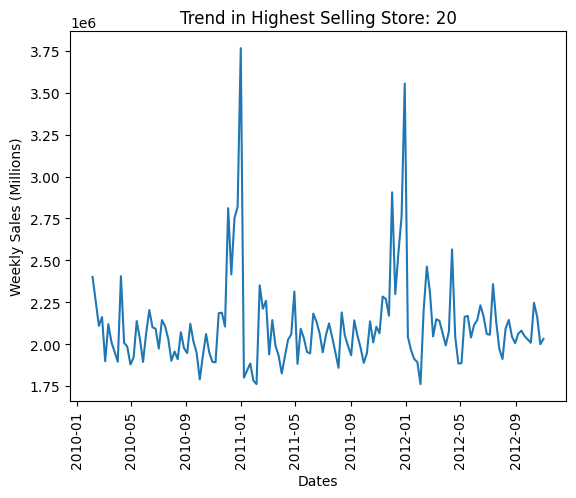

In [88]:
date=datetime(2010,2,5)
lista=[]
lista.append(date)
newDate=date+timedelta(days=7)
while newDate<=datetime(2012,10,26):
  newDate=newDate+timedelta(days=7)
  lista.append(newDate)
totalSales={}
for i in tiendas.keys():
    totalSales[i]= sum(tiendas.get(i))
print("Max Value: ", list(totalSales.keys())
      [list(totalSales.values()).index(max(totalSales.values()))])
plt.plot(lista,tiendas[20])
plt.title('Trend in Highest Selling Store: 20')
plt.xlabel('Dates')
plt.ylabel('Weekly Sales (Millions)')
plt.xticks(rotation='vertical')
plt.show()
#Efectivamente hay un patrón estacional, en Navidad y los meses anteriores hay un gran incremento de ventas.

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

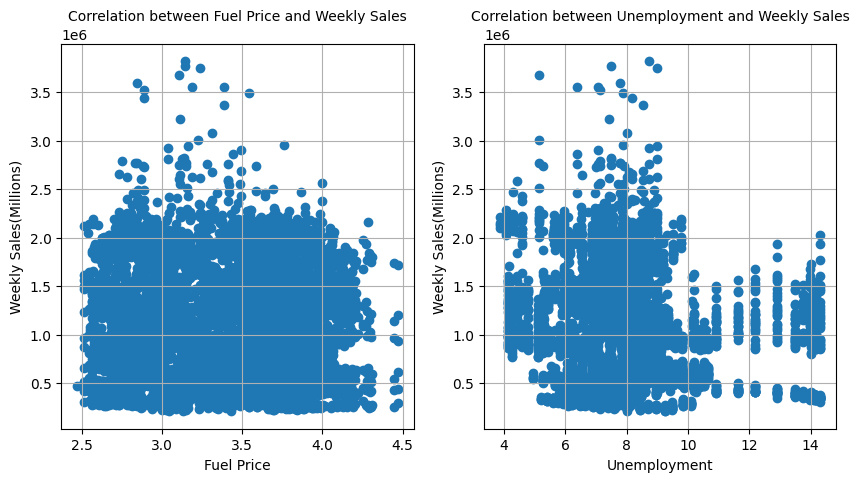

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Primer subgráfico
ax1.scatter(df['Fuel_Price'], df['Weekly_Sales'])
ax1.grid()
ax1.set_xlabel('Fuel Price')
ax1.set_ylabel('Weekly Sales(Millions)')
ax1.set_title('Correlation between Fuel Price and Weekly Sales',fontdict = {'fontsize' : 10})

# Segundo subgráfico
ax2.scatter(df['Unemployment'], df['Weekly_Sales'])
ax2.grid()
ax2.set_xlabel('Unemployment')
ax2.set_ylabel('Weekly Sales(Millions)')
ax2.set_title('Correlation between Unemployment and Weekly Sales',fontdict = {'fontsize' : 10})


plt.show()
#No parece que haya una alta correlación de ambas variables con Weekly Sales, ya que de ser el caso
# cuando aumentase uno aumentaría el otro o al reves, pero no se detecta ninguna tendencia.

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


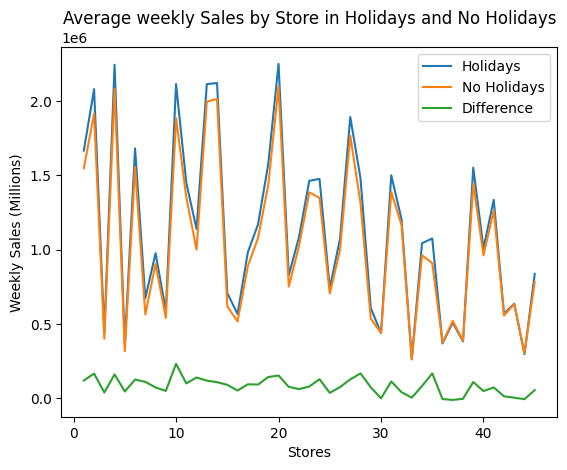

Highest difference: 0.12236253562849125


In [132]:
tiendasHoliday={}
tiendasNoHoliday={}
for i in range(0,6433):
    if  df.loc[i]['Holiday_Flag']==1 and df.loc[i]['Store'] in tiendasHoliday.keys():
        tiendasHoliday[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
    elif df.loc[i]['Holiday_Flag']==0 and df.loc[i]['Store'] in tiendasNoHoliday.keys():
        tiendasNoHoliday[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
    elif df.loc[i]['Holiday_Flag']==0 and df.loc[i]['Store'] not in tiendasNoHoliday.keys():
        tiendasNoHoliday[df.loc[i]['Store']]=[]
        tiendasNoHoliday[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
    else:
        tiendasHoliday[df.loc[i]['Store']]=[]
        tiendasHoliday[df.loc[i]['Store']].append(df.loc[i]['Weekly_Sales'])
promedioHoliday={}
for i in tiendas.keys():
    promedioHoliday[i]= st.mean(tiendasHoliday.get(i))
promedioNoHoliday={}
for i in tiendasNoHoliday.keys():
    promedioNoHoliday[i]= st.mean(tiendasNoHoliday.get(i))
diff={}
for i in promedioHoliday.keys():
    diff[i]=promedioHoliday[i]-promedioNoHoliday[i]
plt.plot(promedioHoliday.keys(),promedioHoliday.values(),label='Holidays') 
plt.plot(promedioHoliday.keys(),promedioNoHoliday.values(),label='No Holidays') 
plt.plot(promedioHoliday.keys(),diff.values(),label='Difference')
plt.title('Average weekly Sales by Store in Holidays and No Holidays')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales (Millions)')
plt.legend()
plt.show()
#There is a clear difference between it been a holiday and when it is not, the highest is 12%
print('Highest difference: {}'.format(diff[10]/promedioNoHoliday[10]))

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [178]:
X=df[['CPI','Temperature','Holiday_Flag','Fuel_Price','Store']]
y=df[['Weekly_Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions1=lr.predict(X_test)
print(lr.coef_)
#Model 2
X=df[['CPI','Holiday_Flag','Store']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions2=lr.predict(X_test)
#Model 3
X=df[['Temperature','Fuel_Price','Store']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions3=lr.predict(X_test)
#Model 4
X=df[['CPI','Holiday_Flag','Store','Temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions4=lr.predict(X_test)



[[ -1988.25171943  -1268.18949977  52679.89487283  21464.73243397
  -15862.37047343]]


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [177]:
print("-----------MODEL 1----------")
print("El RMSE de train del modelo es: {}".format(root_mean_squared_error(y_test,predictions1)))
print("El R2 de train del modelo es: {}".format(r2_score(y_test,predictions1)))
print("-----------MODEL 2----------")
print("El RMSE de train del modelo es: {}".format(root_mean_squared_error(y_test,predictions2)))
print("El R2 de train del modelo es: {}".format(r2_score(y_test,predictions2)))
print("-----------MODEL 3----------")
print("El RMSE de train del modelo es: {}".format(root_mean_squared_error(y_test,predictions3)))
print("El R2 de train del modelo es: {}".format(r2_score(y_test,predictions3)))
print("-----------MODEL 4----------")
print("El RMSE de train del modelo es: {}".format(root_mean_squared_error(y_test,predictions3)))
print("El R2 de train del modelo es: {}".format(r2_score(y_test,predictions4)))


-----------MODEL 1----------
El RMSE de train del modelo es: 518025.93754371285
El R2 de train del modelo es: 0.1474623494727867
-----------MODEL 2----------
El RMSE de train del modelo es: 518937.58342630597
El R2 de train del modelo es: 0.14445903913796254
-----------MODEL 3----------
El RMSE de train del modelo es: 523887.65771473304
El R2 de train del modelo es: 0.12805941826249956
-----------MODEL 4----------
El RMSE de train del modelo es: 523887.65771473304
El R2 de train del modelo es: 0.1472789550849768


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

In [168]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Por los coeficientes resultantes del modelo que mejor resultado ha dado, sabemos que influye de manera positiva que sea Holiday. E influye de manera negativa que haya altas temperaturas, que el CPI este alto; además segun el coeficiente de Store, las tiendas con valores más pequeños tienen tendencia a vender más.

Con el dataset que tenemos es complicado hacer una recomendación de mejora a la empresa, porque todas las variables menos la tienda son factores externos que la empresa no puede manejar, por lo tanto la única recomendación posible, es que den más enfasis a las empresas con número menor y que se aprovisione de más recurso si es un Holiday, el CPI esta bajo o hay temperaturas bajas
